# Keras neural network Image Classification with Dropout Regularization
* notebook by Adam Lang
* Date: 2/23/2024
* We will demonstrate `Dropout Regularization` to reduce overfitting in the neural network.

# Problem Statement
* Classify images of vehicles as emergency or non-emergency (i.e. firetruck, police car vs. regular car)
* Binary classification problem.
      1 = emergency
      2 = non-emergency

# What is Dropout Regularization?
* As we know, overfitting is when the model begins to memorize the training data, as well as not learning patterns or signals from the training data.
* Thus, the model performs poorly on the validation data.
* We can use `Dropout Regularization` to prevent overfitting.

# How does Dropout Regularization work?
* We set a probability threshold of let's say 0.5. This means that 50% of the hidden layer neurons will be dropped during training.
* We can see this here:

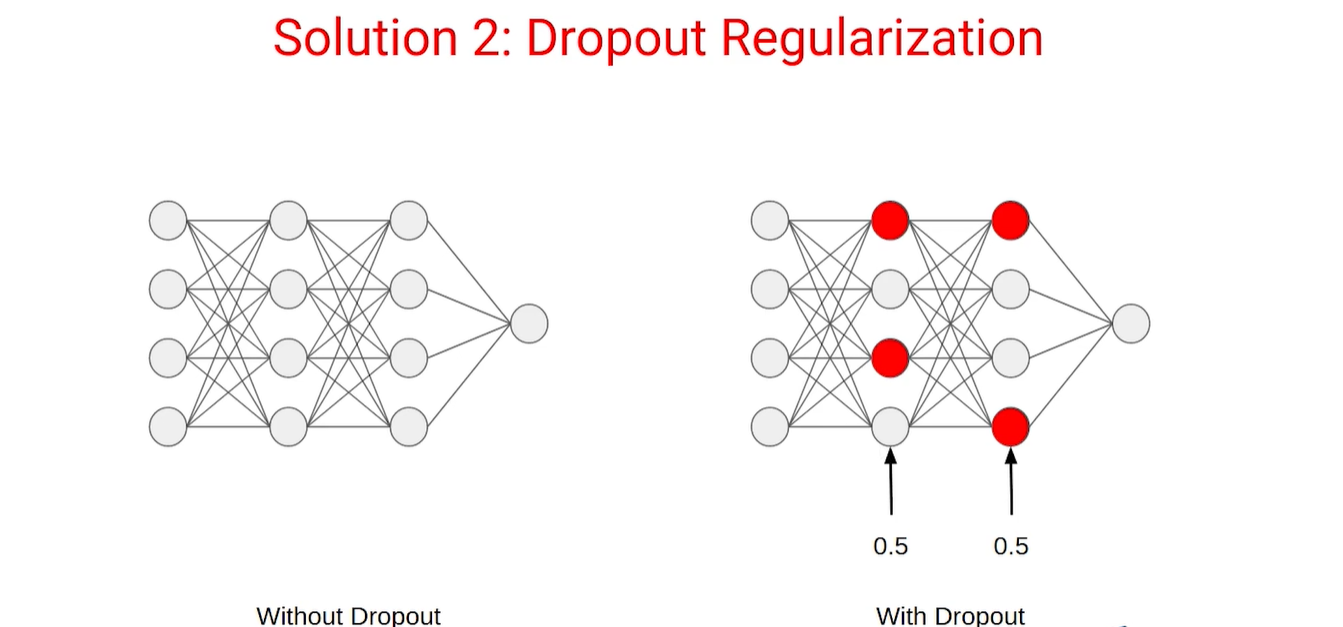




# What ends up happening?
* The red neurons which are 50% of the neurons in each hidden layer are disconnected from the propagation process.

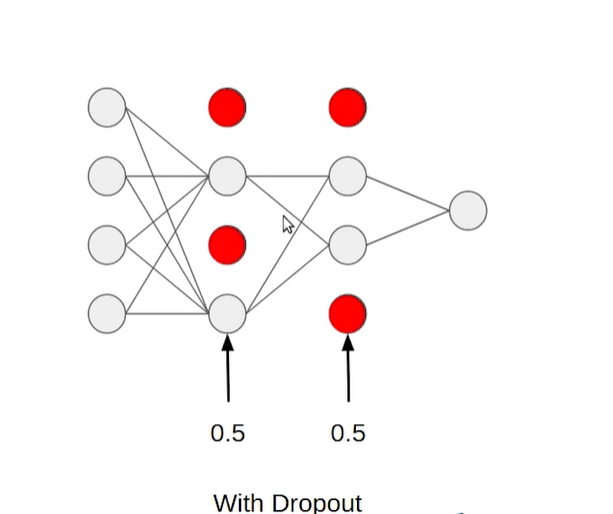

## So how does this help prevent overfitting?
* We can see below the blue neuron takes in an input feature.
* Overfitting would occur where a specific nodule or nodules will only learn the specific input feature and data point(s) and thus will not be able to generalize on new unseen data features or data point(s).
* Thus if we provide dropout we can reduce the probability of this happening.
* We introduce random dropout to essentially "blind" the network from knowing and overfitting specific parameters thus it can hopefully generalize on any new feature data it is given.
* As we can see below, the blue neuron connections are an example of a neuronal connection overfitting or learning specific features/data. In the red image we remove this connection and "dropout" thus allowing randomization and prevent overfitting.

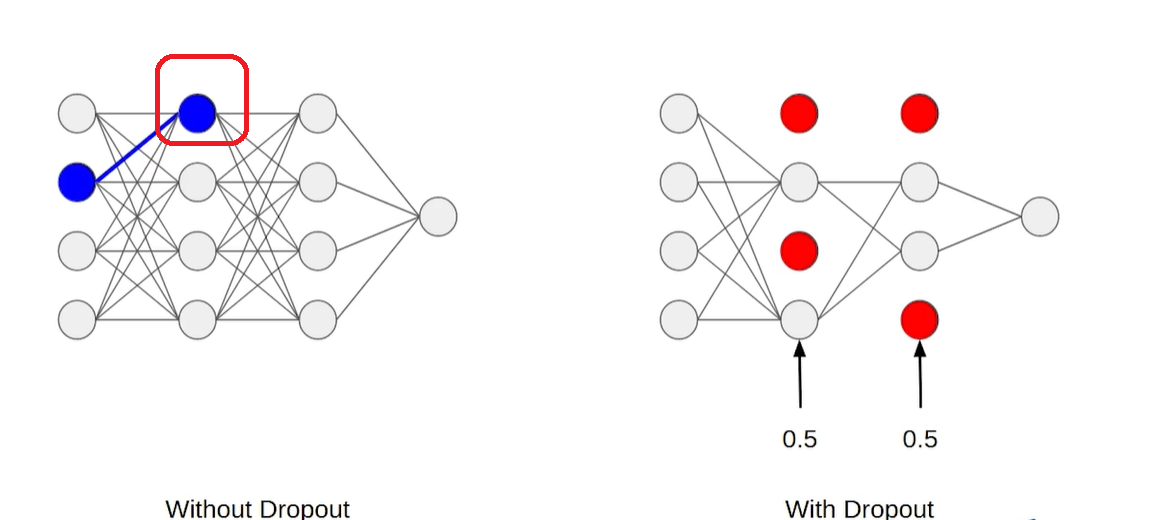


# General Rules of Dropout Regularization
1. At each itearation neurons are dropped randomly.
2. Generally we don't apply dropout on the input layer only hidden layers.
3. No dropout during test time => so all neurons are activated in hidden layers to generate output of test set.



# Steps in Keras to solve binary classification problem including Dropout Regularization

1. Load dataset
2. Pre-process data
3. Create training and validation set
4. **Defining model architecture** (*define dropout layers here*)
5. Compiling model
6. Training model
7. Evaluating model performance
    

# 1. Loading dataset

In [1]:
# import libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation sets
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [13]:
# if using code to mount drive use this code block to unzip file
!unzip Dataset.zip


Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg  
  inflating: Dataset/

In [14]:
# reading csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/Dataset/emergency_classification.csv')

In [15]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [16]:
# looking at first 5 rows of data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [17]:
# load images and store it in numpy array

# empty list to store images
X = []
# iterating over each image
for img_name in data.image_names:
  # loading image using its name
  img = plt.imread('Dataset/images/' + img_name)
  # saving each image in the list
  X.append(img)


# converting the list of images into array
X = np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

# 2. Pre-processing the data


In [18]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [19]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

# 3. Creating training and validation set

In [20]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [21]:
# shape of trainin and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

# 4. Defining the model architecture

* Add dropout layer(s)

In [22]:
# importing the dropout layer
from keras.layers import Dropout

In [29]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,))) #input layer with input shape
model.add(Dense(100, activation='sigmoid')) #hidden layer
model.add(Dropout(rate=0.5)) #dropout probability is 50%
model.add(Dense(100, activation='sigmoid')) #hidden layer
model.add(Dropout(rate=0.3)) #dropout probability is 30%
model.add(Dense(units=1, activation='sigmoid')) #output layer - single neuron - binary classification

# 5. Compiling model

In [30]:
# defining adam optimizer and setting learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [31]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# 6. Training the model using Dropout

In [32]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/100
13/13 [==============================] - 11s 703ms/step - loss: 0.7282 - accuracy: 0.5346 - val_loss: 0.6999 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 5s 413ms/step - loss: 0.7203 - accuracy: 0.5383 - val_loss: 0.6967 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 6s 471ms/step - loss: 0.7097 - accuracy: 0.5626 - val_loss: 0.6891 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 6s 421ms/step - loss: 0.7003 - accuracy: 0.5559 - val_loss: 0.6811 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 5s 407ms/step - loss: 0.6970 - accuracy: 0.5595 - val_loss: 0.6750 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 6s 456ms/step - loss: 0.6945 - accuracy: 0.5626 - val_loss: 0.6705 - val_accuracy: 0.5609
Epoch 7/100
13/13 [==============================] - 5s 408ms/step - loss: 0.6918 - accuracy: 0.5632 - val_loss: 0.6666 - val_accuracy: 0.560

# 7. Evaluating model performance
* using `accuracy_score` from sklearn metrics

In [33]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0, 1)))

23/23 [==============================] - 1s 40ms/step
Accuracy on validation set: 0.7138810198300283


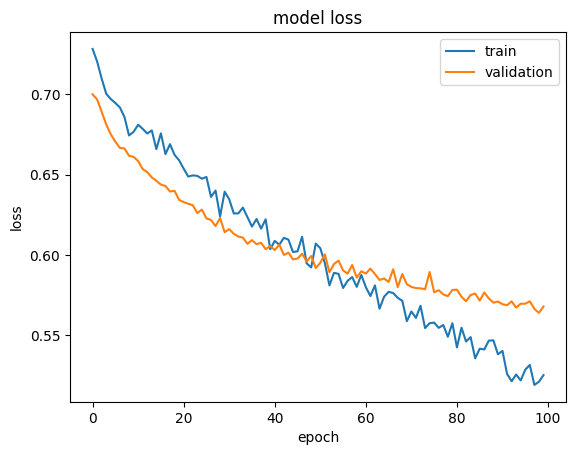

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Summary:
* Initially I used a dropout rate of 0.5 for 1st hidden layer and 0.5 for 2nd hidden layer. However, the loss was rather high and the model did not perform well on the validation set.
* So, I changed the 2nd hidden layer dropout to 0.3 to dropout 30% of the neurons and this model performed much better with less validation loss and only began to overfit the data around 60 epochs.
* General rule to keep the dropout between 0.2 to 0.5.
* There are other dropout techniques to try such as Gaussian Dropout as well as other ways to determine an ideal dropout probability such as grid search. But we will explore that further in another notebook.